<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/M%C3%A9todo_de_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE COLOCACIÓN PARA EDO
**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación:
$${\frac{d^2 u}{dx^2} + u = - x }$$

con condiciones:
- **Condición inicial:** $u(0) = u(1) = 0$
- **Dominio:** $0 \leq x \leq 1$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x') #introduciomos una variable
u = sp.Function('u') #Esto es una función

Para resolver la ecuación

In [3]:
ode =u(x).diff(x,x) + u(x) + x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [4]:
sol = sp.dsolve(ode, ics={ u(0): 0, u(1): 0 }) # diccionario

In [5]:
sol

Eq(u(x), -x + sin(x)/sin(1))

In [6]:
#Comvertimos en un arreglo de numpy
u_expr = sol.rhs
u_num  = sp.lambdify(x, u_expr,"numpy")

In [7]:
xx = np.linspace(0, 1, 100) #np.linspace() Crea un array de números equiespaciados en un intervalo:
yy = u_num(xx)

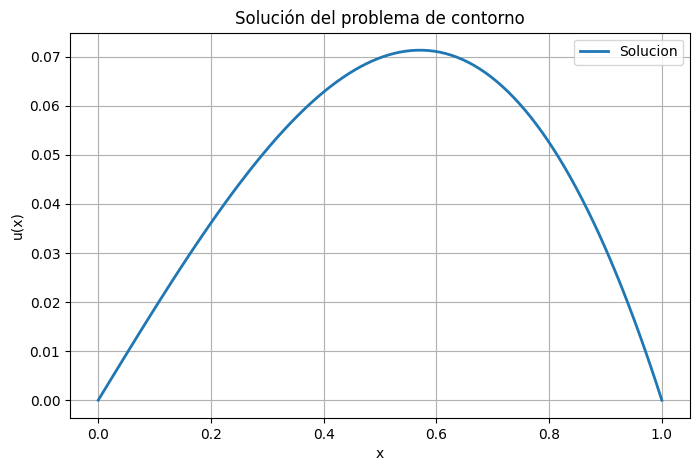

In [8]:
plt.figure(figsize=(8, 5)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
plt.plot(xx, yy, label="Solucion", linewidth=2) #Dibuja la solución como una línea
plt.title('Solución del problema de contorno') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('u(x)') #Etiquetan los ejes
plt.grid() #Añade una cuadrícula al gráfico
plt.legend() #Añade una leyenda al gráfico
plt.show() #Muestra el gráfico en pantalla

In [9]:
a,b = sp.symbols('a  b')

#Funcion de prueba u_n(x) que cumple u(0)=u(1)=0
u_n = a*x*(1-x) + b*x**2*(1-x)

In [10]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [11]:
u_n_2 = sp.diff(u_n, x, 2)

F = u_n_2 + u_n

In [12]:
F

a*x*(1 - x) + b*x**2*(1 - x) - 2*(a + 2*b*x + b*(x - 1))

In [13]:
#Puntos de colocacion

points =[sp.Rational(1,4), sp.Rational(1,2)]

In [14]:
points

[1/4, 1/2]

In [15]:
eqs = [sp.Eq(F.subs(x,p),-p) for p in points]

#Resolver para a y b
sol = sp.solve(eqs, [a,b])

In [16]:
for eq in eqs:
    print(eq)

Eq(-29*a/16 + 35*b/64, -1/4)
Eq(-7*a/4 - 7*b/8, -1/2)


In [17]:
print ("Sistema de ecuciones simbolico: ")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuciones simbolico: 
  29⋅a   35⋅b       
- ──── + ──── = -1/4
   16     64        
  7⋅a   7⋅b       
- ─── - ─── = -1/2
   4     8        


In [18]:
sol

{a: 6/31, b: 40/217}

In [19]:
#Sustutuir en la funcion de prueba
u_approx = u_n.subs(sol)

In [20]:
u_approx

40*x**2*(1 - x)/217 + 6*x*(1 - x)/31

In [21]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

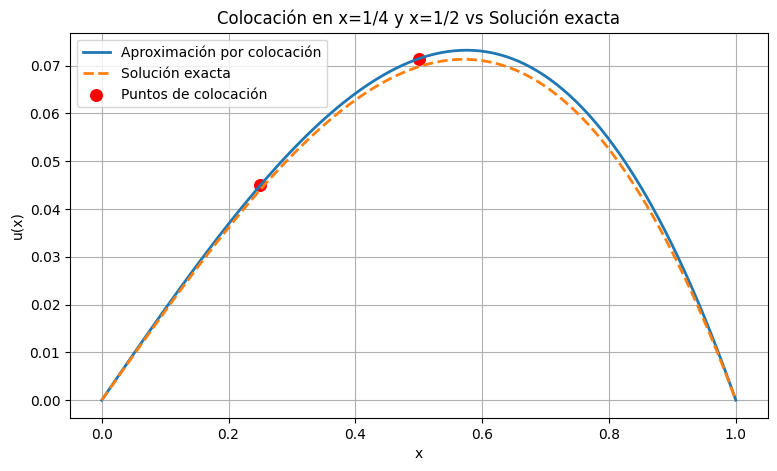

In [22]:
#Solución analítica y númerica
xx = np.linspace(0,1,100)
plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

#puntos de colocación
plt.scatter([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
           color="red", s=70, label="Puntos de colocación")

plt.title("Colocación en x=1/4 y x=1/2 vs Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()